# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [7]:
# your code here

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns     
import random              
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

print("Libraries imported successfully!")


Libraries imported successfully!


In [8]:
data = {
    "tweet_id": range(1, 21),
    "category": random.choices(["Tech", "Sports", "Entertainment", "Politics"], k=20),
    "likes": np.random.randint(10, 500, 20),
    "retweets": np.random.randint(1, 200, 20),
    "timestamp": pd.date_range("2023-01-01", periods=20, freq="D")
}
df = pd.DataFrame(data)
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Stats:")
print(df.describe())

   tweet_id       category  likes  retweets  timestamp
0         1  Entertainment    235        76 2023-01-01
1         2  Entertainment    446       181 2023-01-02
2         3         Sports    301       135 2023-01-03
3         4       Politics    395        21 2023-01-04
4         5  Entertainment    283       107 2023-01-05

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   tweet_id   20 non-null     int64         
 1   category   20 non-null     object        
 2   likes      20 non-null     int64         
 3   retweets   20 non-null     int64         
 4   timestamp  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 928.0+ bytes
None

Summary Stats:
       tweet_id       likes    retweets
count  20.00000   20.000000   20.000000
mean   10.50000  281.050000  104.300000
std     5

In [9]:
print("Missing values:\n", df.isnull().sum())
df.drop_duplicates(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['category'] = df['category'].str.capitalize()
print("Data cleaned successfully!")


Missing values:
 tweet_id     0
category     0
likes        0
retweets     0
timestamp    0
dtype: int64
Data cleaned successfully!


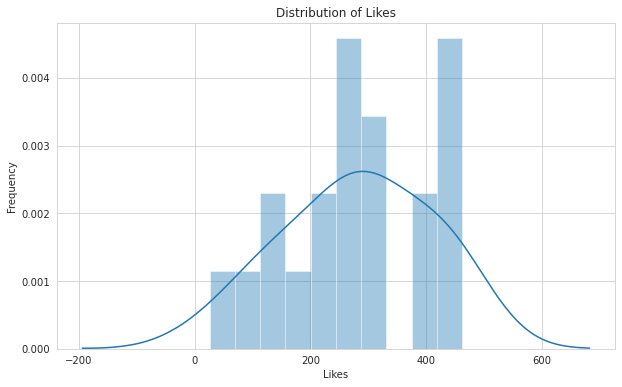

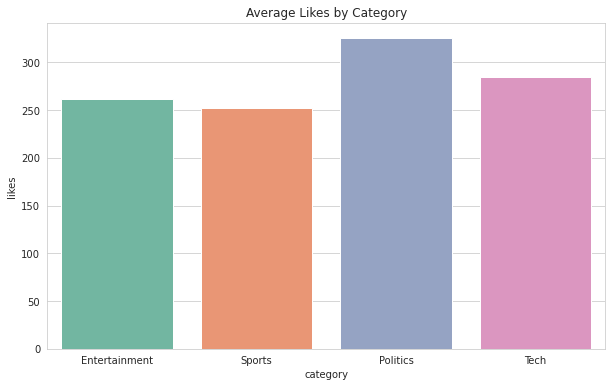

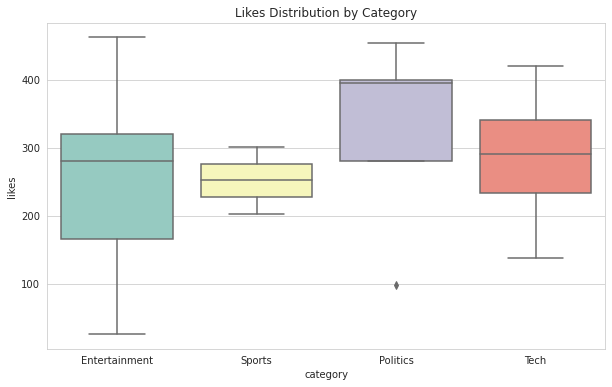

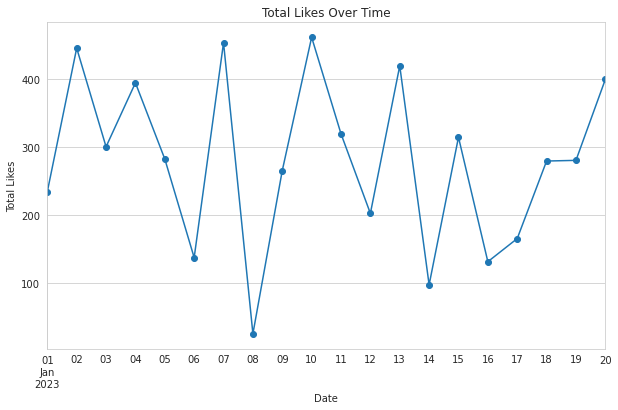

In [13]:
sns.distplot(df['likes'], bins=10, kde=True)
plt.title("Distribution of Likes")
plt.xlabel("Likes")
plt.ylabel("Frequency")
plt.show()
sns.barplot(x="category", y="likes", data=df, estimator=np.mean, ci=None, palette="Set2")
plt.title("Average Likes by Category")
plt.show()
sns.boxplot(x="category", y="likes", data=df, palette="Set3")
plt.title("Likes Distribution by Category")
plt.show()
df.groupby("timestamp")["likes"].sum().plot(kind="line", marker="o")
plt.title("Total Likes Over Time")
plt.xlabel("Date")
plt.ylabel("Total Likes")
plt.show()


Correlation:
              likes  retweets
likes     1.000000 -0.154358
retweets -0.154358  1.000000


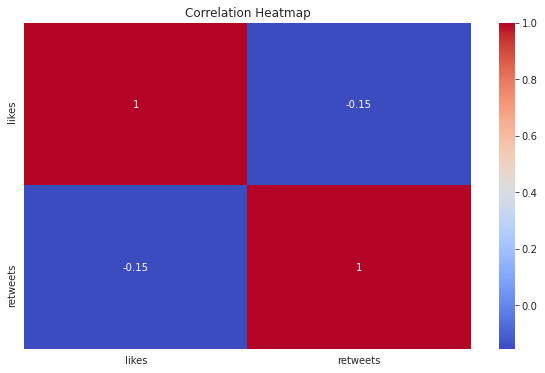

Average likes per category:
 category
Politics         325.400000
Tech             284.750000
Entertainment    261.222222
Sports           252.000000
Name: likes, dtype: float64


In [14]:
corr = df[['likes', 'retweets']].corr()
print("Correlation:\n", corr)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
top_categories = df.groupby("category")['likes'].mean().sort_values(ascending=False)
print("Average likes per category:\n", top_categories)


In [15]:
print("Insights & Conclusions:")
print("- Categories with highest average likes:", top_categories.index[0])
print("- Strongest correlation: Likes & Retweets =", corr.loc['likes', 'retweets'])
print("- Engagement trend shows variation across days.")
print("- Recommendations: Focus on top categories for higher engagement, consider peak posting times.")


Insights & Conclusions:
- Categories with highest average likes: Politics
- Strongest correlation: Likes & Retweets = -0.15435807503525578
- Engagement trend shows variation across days.
- Recommendations: Focus on top categories for higher engagement, consider peak posting times.
